In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

In [4]:
salary = [11,40,45,68,65,68,78,90,57,74,91,92,88,68,57,48,99,101,68,77,110,140]

In [5]:
salary

[11,
 40,
 45,
 68,
 65,
 68,
 78,
 90,
 57,
 74,
 91,
 92,
 88,
 68,
 57,
 48,
 99,
 101,
 68,
 77,
 110,
 140]

## **5 Point Summery:**

In [7]:
np.quantile(salary,[0,0.25,0.5,0.75,0.1])

array([11.  , 59.  , 71.  , 90.75, 45.3 ])

In [9]:
df = pd.DataFrame(salary,columns=['Salary'])

In [10]:
df

,Salary
0,11
1,40
2,45
3,68
4,65
5,68
6,78
7,90
8,57
9,74


In [11]:
df.describe()

,Salary
count,22.000000
mean,74.318182
std,27.201867
min,11.000000
25%,59.000000
50%,71.000000
75%,90.750000
max,140.000000


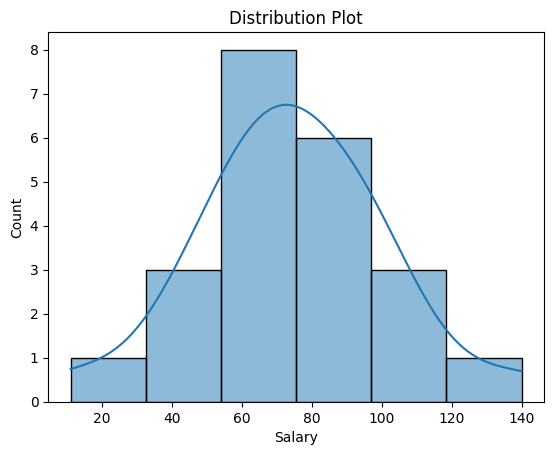

In [23]:
sns.histplot(df['Salary'],kde=True)
plt.title('Distribution Plot')
plt.show()

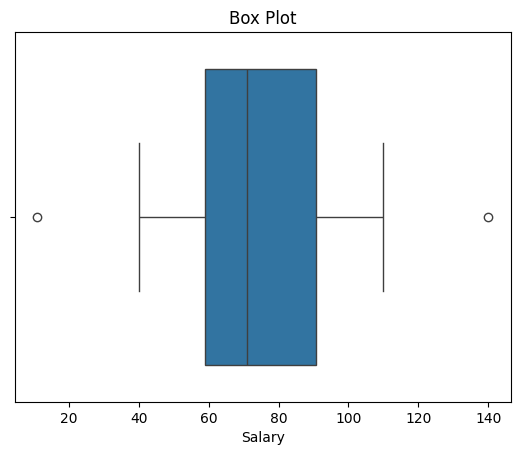

In [26]:
sns.boxplot(data=df,x='Salary')
plt.title('Box Plot')
plt.show()

# **Dropping Outliers**:

As the distribution plot is not skewed and the box plot has datas beyond lower and upper fence! These are outliers

In [28]:
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)

In [29]:
IQR = Q3-Q1

In [30]:
lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR

In [34]:
df_filtered = df[(df.Salary>=lower_fence) & (df.Salary<=upper_fence)]

In [35]:
df.shape

(22, 1)

In [36]:
df_filtered.shape

(20, 1)

In [37]:
df_filtered

,Salary
1,40
2,45
3,68
4,65
5,68
6,78
7,90
8,57
9,74
10,91


# **Now to see the plots if Outlier Removed:**

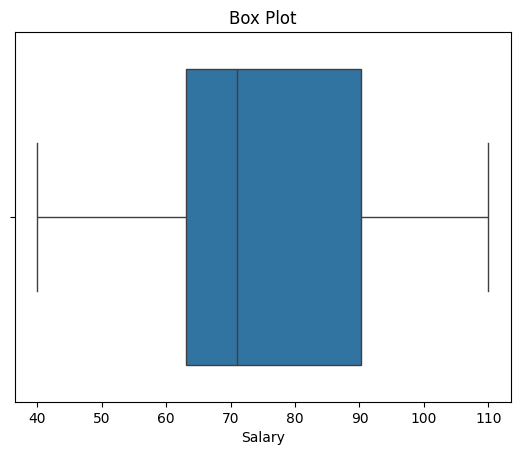

In [38]:
sns.boxplot(data=df_filtered,x='Salary')
plt.title('Box Plot')
plt.show()

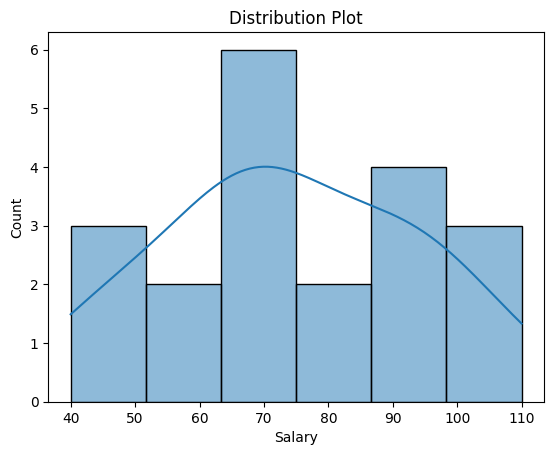

In [40]:
sns.histplot(df_filtered['Salary'],kde=True)
plt.title('Distribution Plot')
plt.show()

# **Imputation with mean and median:**

## **mean():**

In [43]:
df['salary_imputed_mean'] = np.where((df.Salary>=upper_fence) | (df.Salary<=lower_fence),
                                     df['Salary'].mean(),df['Salary'])

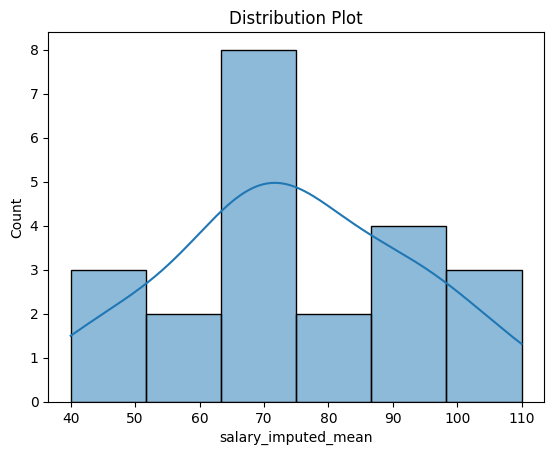

In [44]:
sns.histplot(df['salary_imputed_mean'],kde=True)
plt.title('Distribution Plot')
plt.show()

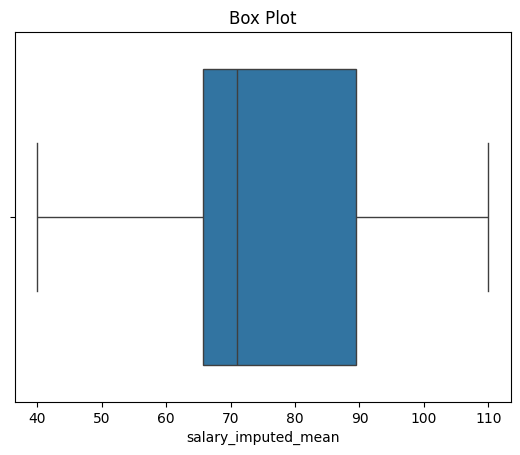

In [56]:
sns.boxplot(data=df,x='salary_imputed_mean')
plt.title('Box Plot')
plt.show()

# **median():**

In [53]:
df['salary_imputed_mean'] = np.where((df.Salary>=upper_fence) | (df.Salary<=lower_fence),
                                     df['Salary'].median(),df['Salary'])

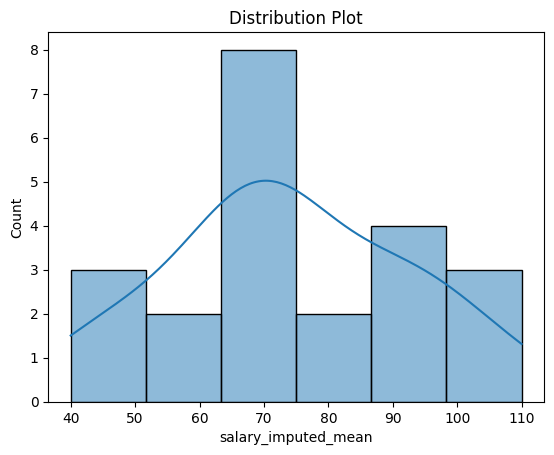

In [54]:
sns.histplot(df['salary_imputed_mean'],kde=True)
plt.title('Distribution Plot')
plt.show()

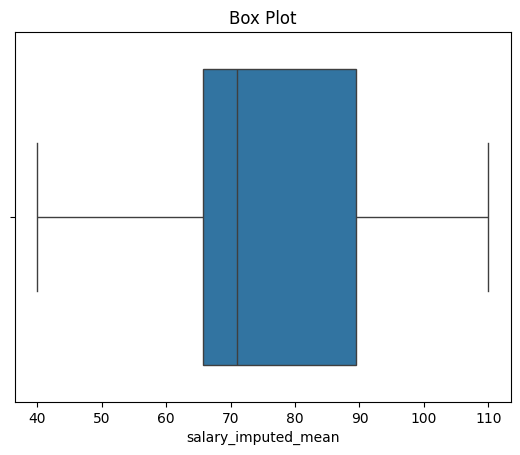

In [55]:
sns.boxplot(data=df,x='salary_imputed_mean')
plt.title('Box Plot')
plt.show()
#

# **Replacing the nearest value which is not outlier**

In [57]:
lower_cap = df['Salary'].quantile(0.05)
# lower cap is 5th percentile

In [59]:
upper_cap = df['Salary'].quantile(0.95)
# upper cap is 95th percentile

In [61]:
lower_cap

np.float64(40.25)

In [62]:
upper_cap

np.float64(109.55)

In [66]:
df['salary_capped'] = np.where(df['Salary']<lower_cap,lower_cap,
                               np.where(df['Salary']>upper_cap,upper_cap,
                               df['Salary']))

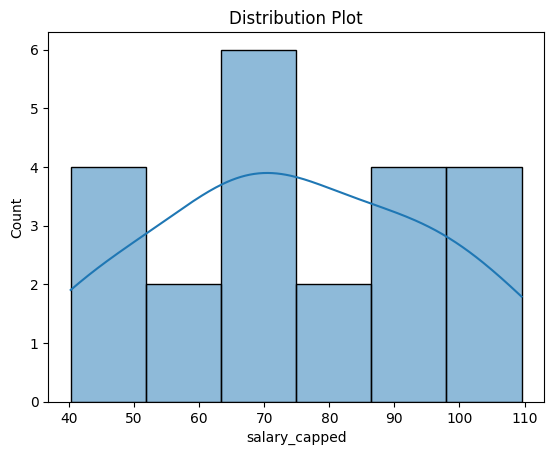

In [67]:
sns.histplot(df['salary_capped'],kde=True)
plt.title('Distribution Plot')
plt.show()

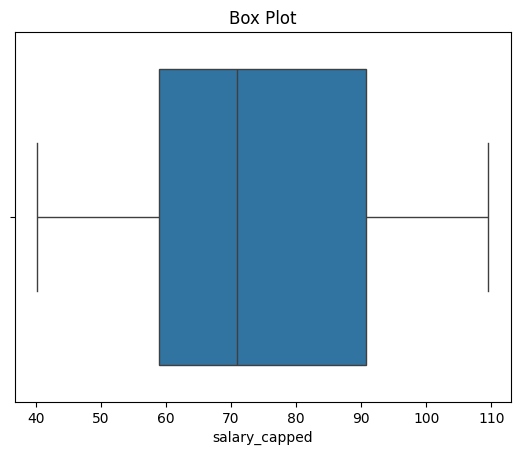

In [68]:
sns.boxplot(data=df,x='salary_capped')
plt.title('Box Plot')
plt.show()